<a href="https://colab.research.google.com/github/OTARYU/amplify_hackathon_sample/blob/main/amplify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install amplify
from amplify import sum_poly, pair_sum, product
from amplify.constraint import equal_to,less_equal,greater_equal,penalty
from amplify import gen_symbols, BinaryPoly
from amplify import Solver
from amplify.client import FixstarsClient
from amplify import decode_solution
import numpy as np 
CLIENT_TOKEN = "0iHDTv6xm4VdmOPiCFa1YA8OCwHdMNfP"
TIME_OUT = 1000

In [127]:
# 生産オーダー　辞書のリスト
# {
#     "order_num" : 0,オーダーの番号（オーダーの色分け）:int
#     "name" : "order_1",　オーダーの名前:str
#     "pre_node_num" : [0]　ひとつ前にやらなくてはいけないオーダー（中間生産物を作るためのオーダー）:intのlist
#     "machine" : 0,　作業に使う機械:int
#     "time" : 1　　　作業時間:int
# },
orders = [
    {
      "order_num" : 0,
      "name" : "order_1",
      "pre_node_num" : [],
      "machine" : 0,
      "time" : 4
    },
    {
      "order_num" : 1,
      "name" : "order_2",
      "pre_node_num" : [],
      "machine" : 0,
      "time" : 1
    },
    {
      "order_num" : 2,
      "name" : "order_3",
      "pre_node_num" : [],
      "machine" : 0,
      "time" : 2
    },
    {
      "order_num" : 3,
      "name" : "order_4",
      "pre_node_num" : [],
      "machine" : 2,
      "time" : 10
    },
    {
      "order_num" : 0,
      "name" : "order_5",
      "pre_node_num" : [0],
      "machine" : 3,
      "time" : 5
  },
  {
      "order_num" : 0,
      "name" : "order_6",
      "pre_node_num" : [0],
      "machine" : 2,
      "time" : 5
  },
    {
      "order_num" : 3,
      "name" : "order_7",
      "pre_node_num" : [3,5],
      "machine" : 1,
      "time" : 5
  },

]


In [115]:
# オーダーの数
N_o = len(orders)
# 機械の数
N_m = 0
# 総生産時間
N_t = 0
N_order_num = 0
for order in range(N_o):
  N_t += orders[order]["time"]
  N_m = max(N_m,orders[order]["machine"]+1)
  N_order_num = max(N_order_num,orders[order]["order_num"]+1)
N_o, N_t

(7, 32)

In [116]:
# 決定変数を (No x Nt) の配列の形式で定義（オーダーと時間の積）
q = gen_symbols(BinaryPoly, N_o, N_t)

In [87]:
# for o in range(N_o):
#   for o_2 in orders[o]["pre_node_num"]:
#     print(orders[o_2]["time"])
#     for t in range(N_t-orders[o_2]["time"]):
#       print(sum([equal_to(q[o_2][t]*sum_poly(t+orders[o_2]["time"], lambda dt: q[o][dt]),0)]))

4
(q_0 q_14 + q_0 q_15 + q_0 q_16 + q_0 q_17 == 0.000000, 1)
(q_1 q_14 + q_1 q_15 + q_1 q_16 + q_1 q_17 + q_1 q_18 == 0.000000, 1)
(q_2 q_14 + q_2 q_15 + q_2 q_16 + q_2 q_17 + q_2 q_18 + q_2 q_19 == 0.000000, 1)
(q_3 q_14 + q_3 q_15 + q_3 q_16 + q_3 q_17 + q_3 q_18 + q_3 q_19 + q_3 q_20 == 0.000000, 1)
(q_4 q_14 + q_4 q_15 + q_4 q_16 + q_4 q_17 + q_4 q_18 + q_4 q_19 + q_4 q_20 + q_4 q_21 == 0.000000, 1)
(q_5 q_14 + q_5 q_15 + q_5 q_16 + q_5 q_17 + q_5 q_18 + q_5 q_19 + q_5 q_20 + q_5 q_21 + q_5 q_22 == 0.000000, 1)
(q_6 q_14 + q_6 q_15 + q_6 q_16 + q_6 q_17 + q_6 q_18 + q_6 q_19 + q_6 q_20 + q_6 q_21 + q_6 q_22 + q_6 q_23 == 0.000000, 1)
(q_7 q_14 + q_7 q_15 + q_7 q_16 + q_7 q_17 + q_7 q_18 + q_7 q_19 + q_7 q_20 + q_7 q_21 + q_7 q_22 + q_7 q_23 + q_7 q_24 == 0.000000, 1)
(q_8 q_14 + q_8 q_15 + q_8 q_16 + q_8 q_17 + q_8 q_18 + q_8 q_19 + q_8 q_20 + q_8 q_21 + q_8 q_22 + q_8 q_23 + q_8 q_24 + q_8 q_25 == 0.000000, 1)
(q_9 q_14 + q_9 q_15 + q_9 q_16 + q_9 q_17 + q_9 q_18 + q_9 q_19 + q_9 

In [117]:
#　すべてのオーダーにマシンを割り当てる制約
constraintses = sum([equal_to(sum_poly(N_t, lambda t:q[o][t]), 1)for o in range(N_o)])
# 同じマシンを同じ時間に使わないように制約　（オーダーiの開始点+オーダーiの時間内に同じ機械を使うオーダーが占有しないようにする）
for o in range(N_o):
  for o_2 in range(N_o):
      if o != o_2 and orders[o]["machine"] == orders[o_2]["machine"]:
        d_1 = orders[o]["time"]
        constraintses += sum([less_equal(q[o][t]+sum_poly(d_1, lambda d_t:q[o_2][t+d_t]),1)for t in range(N_t-d_1)])

# 順序付きのオーダー制約　先行オーダーが終わらないうちにオーダーをいれない
for o in range(N_o):
  for o_2 in orders[o]["pre_node_num"]:
    for t in range(N_t-orders[o_2]["time"]):
      constraintses += sum([equal_to(q[o_2][t]*sum_poly(t+orders[o_2]["time"], lambda dt: q[o][dt]),0)])
# 制約の重み（ハイパラ）暫定
constraintses *= 1000

# cost 関数　Sumｔ*Useful 占有を開始した時間の和
cost = sum_poly(N_o,lambda o: sum_poly(N_t,lambda t: q[o][t] * t))
model = cost + constraintses

In [118]:
# クライアントを設定
client = FixstarsClient()
client.token = CLIENT_TOKEN  # ローカル環境で使用する場合は、Amplify AEのアクセストークンを入力してください
client.parameters.timeout = TIME_OUT  # タイムアウト1秒
# ソルバーを設定
solver = Solver(client)
# 問題を解く
result = solver.solve(model)
# result が空の場合、制約条件を満たす解が得られなかったことを示す
if len(result) == 0:
  print("out")
  # raise RuntimeError("Given constraint conditions are not satisfied")

In [119]:
# 求めた解を元の変数に代入
values = result[0].values
print("energy :",result[0].energy)
solution = np.array(decode_solution(q, values))
# 各会議がどの会議室に割り当てられるかを読み取る
assignment = list(zip(*np.where(solution == 1)))

36.0


In [120]:
# for i in assignment:
#   print(i)

(0, 1)
(1, 0)
(2, 5)
(3, 0)
(4, 5)
(5, 10)
(6, 15)


In [121]:
# solution

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=object)

In [125]:
# 
# オーダー割り当てを可視化
#
%matplotlib inline
def plot_order_schedule(num_machine, assignment,N_order_num):
    import matplotlib.pyplot as plt

    machine_names = ['Machine ' + chr(65 + i) for i in range(num_machine)]

    cmap = plt.get_cmap("coolwarm", N_order_num)
    colors = [cmap(i) for i in range(N_order_num)]

    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
    max_y = 0
    for n_order,  o_time in assignment:
        max_y = max(max_y,o_time+orders[n_order]["time"])
        plt.fill_between([orders[n_order]["machine"] + 0.55, orders[n_order]["machine"] + 1.45], [o_time, o_time], [o_time+orders[n_order]["time"], o_time+orders[n_order]["time"]], 
                        edgecolor='black', 
                        linewidth=3.0,
                        facecolor=colors[orders[n_order]["order_num"]] 
                        )
        plt.text(orders[n_order]["machine"] + 1.0, o_time + orders[n_order]["time"]/2, orders[n_order]["name"], ha='center', va='center', fontsize=15)
        
    # Set First Axis
    ax1.yaxis.grid()
    ax1.set_xlim(0.5, len(machine_names) + 0.5)
    ax1.set_ylim(0,max_y)
    ax1.set_xticks(range(1, len(machine_names) + 1))
    ax1.set_xticklabels(machine_names)
    ax1.set_ylabel('Time')

    # Set Second Axis
    ax2 = ax1.twiny().twinx()
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_ylim(ax1.get_ylim())
    ax2.set_xticks(ax1.get_xticks())
    ax2.set_xticklabels(machine_names)
    ax2.set_ylabel('Time')

    plt.show()

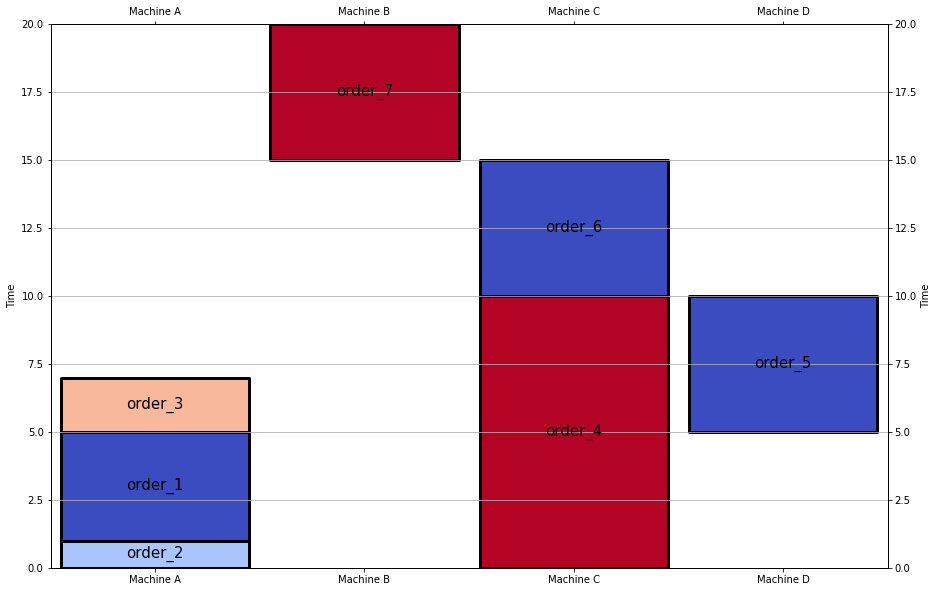

In [126]:
plot_order_schedule(num_machine=N_m, assignment=assignment,N_order_num=N_order_num)

In [ ]:
# todo test